In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [19]:
def calc_mean(old_mean, n, v):
    # Update mean given old mean and num samples
    return (((n-1)*old_mean)/n) + (v/n)

class Bandit(object):
    def __init__(self, mean=0, std=1, init_avg = 0):
        self.mean = mean
        self.std = std
        self.num_pulls = 0
        self.pull_average = init_avg
        
    def pull(self, history=True):
        r = np.random.normal(self.mean, self.std)
        if history:
            self.num_pulls += 1
            self.pull_average = calc_mean(self.pull_average, self.num_pulls, r)
        return r

def run_experiment(bandits, eps, N, seed=1):
    random.seed(seed)
    np.random.seed(seed)
    num_bandits = len(bandits)
    totalmean = 0
    totalmeans = []
    for i in range(N):
        x = random.random()
        if x>eps:
            b = np.argmax([z.pull_average for z in bandits])
        else:
            b = random.randint(0,num_bandits-1)
        r = bandits[b].pull()
        totalmean = calc_mean(totalmean, i+1, r)
        totalmeans.append(totalmean)
    return(totalmeans)
    
bandits = [Bandit(1.0), Bandit(2.0), Bandit(3.0)]
banditsop = [Bandit(1.0, init_avg=10), Bandit(2.0, init_avg=10), Bandit(3.0, init_avg=10)]

epslist = [0.1, 0.05, 0.01]
N = 100000
meanlists = []
for eps in epslist:
    meanlists.append(run_experiment(bandits, eps, N,seed= 5))
meanlists.append(run_experiment(banditsop, -1, N, seed=5))

        
    

3.003742188116046


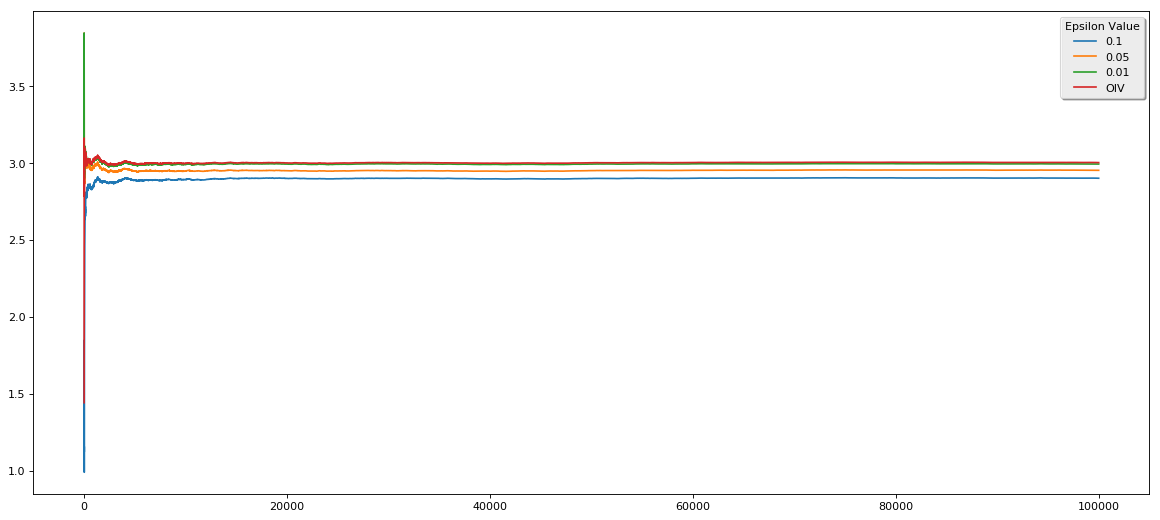

In [20]:
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')

for i in range(len(epslist)):
    plt.plot( list(range(N)), meanlists[i], label = str(epslist[i]))
plt.plot(list(range(N)), meanlists[3], label='OIV')

plt.legend(shadow=True, fancybox=True, title="Epsilon Value")

print(meanlists[3][-1])
plt.show()

3.003742188116046


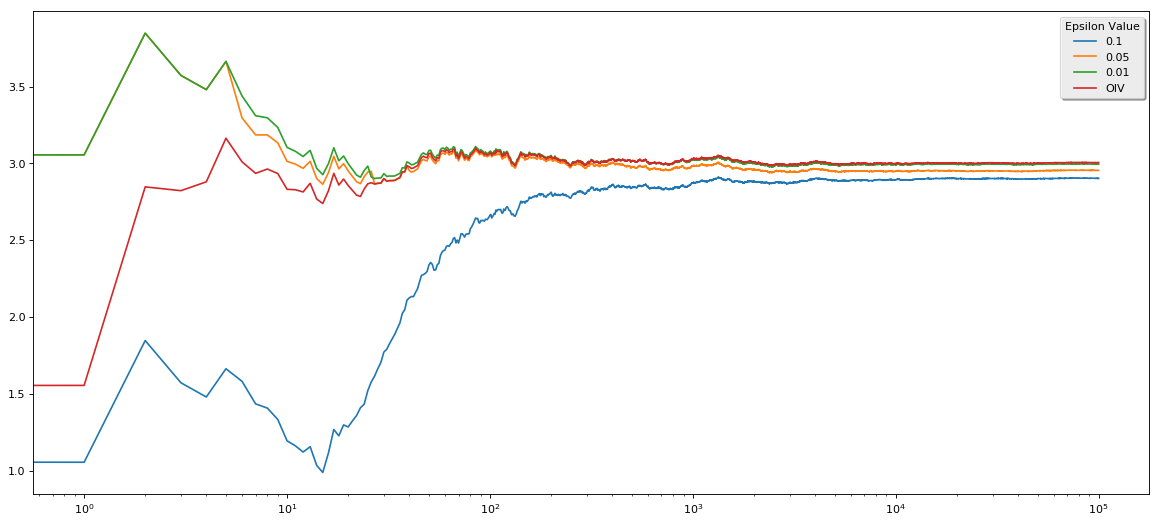

In [21]:
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')

for i in range(len(epslist)):
    plt.plot( list(range(N)), meanlists[i], label = str(epslist[i]))
plt.plot(list(range(N)), meanlists[3], label='OIV')

plt.legend(shadow=True, fancybox=True, title="Epsilon Value")
plt.xscale('log')

print(meanlists[3][-1])
plt.show()